# Plotting workspace comparing the effect of consensus/non-consensus in estimation and motion for our distributed algorithm.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc

from matplotlib import style
from matplotlib.lines import Line2D

import pickle as pkl

plt.rcParams['font.size'] = '16'


In [2]:

def trajectory(p,axis):
    N_sen = p.shape[1]
    for i in range(N_sen):
        axis.scatter(p[:,i,0],p[:,i,1],s=4)
        
def plot_pq(p_trial,q_trial,axis):
        trajectory(p_trial,axis)
        axis.scatter(q_trial[0,0],q_trial[0,1],marker = '*',s=200,edgecolor='r',facecolor='w')

def plot_trial_grid(p,q):
    
    trials = np.random.choice(np.arange(len(p)),size=3*3,replace=False)

    fig, axs = plt.subplots(3, 3,sharex='all',sharey='all',dpi=200)
    axs = axs.flatten()
    for i,trial in enumerate(trials):
        plot_pq(p[trial],q[trial],axs[i])
    fig.tight_layout()
    return fig,axs

def plot_showcase(p,q):
    ft,axs = plot_trial_grid(p,q)
 
    fm = plt.figure(dpi=200)
    p_mean = np.mean(p,axis=0)
    q_mean = np.mean(q,axis=0)
    plot_pq(p_mean,q_mean,plt.gca())
    
    
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Sensor',
                              markerfacecolor='g', markersize=10),
                       Line2D([], [], marker='*',linestyle='None', color='r', label='Source',
                              markerfacecolor='w', markersize=10)]
    plt.legend(handles=legend_elements)
    return ft,fm

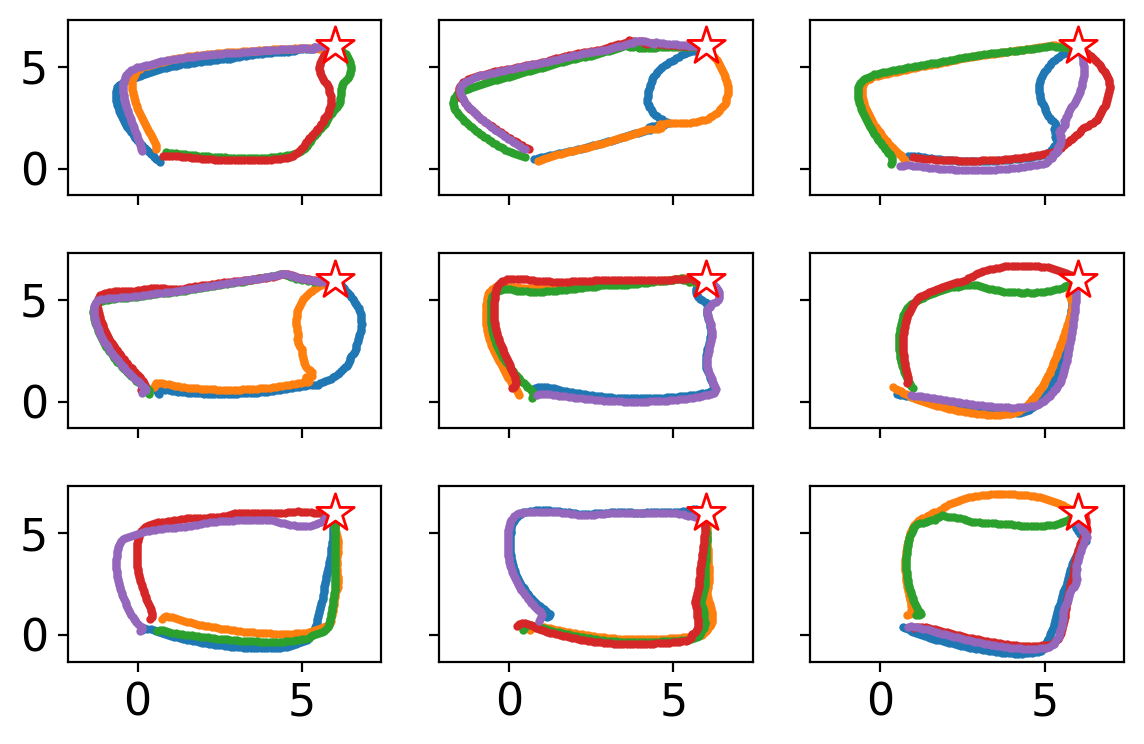

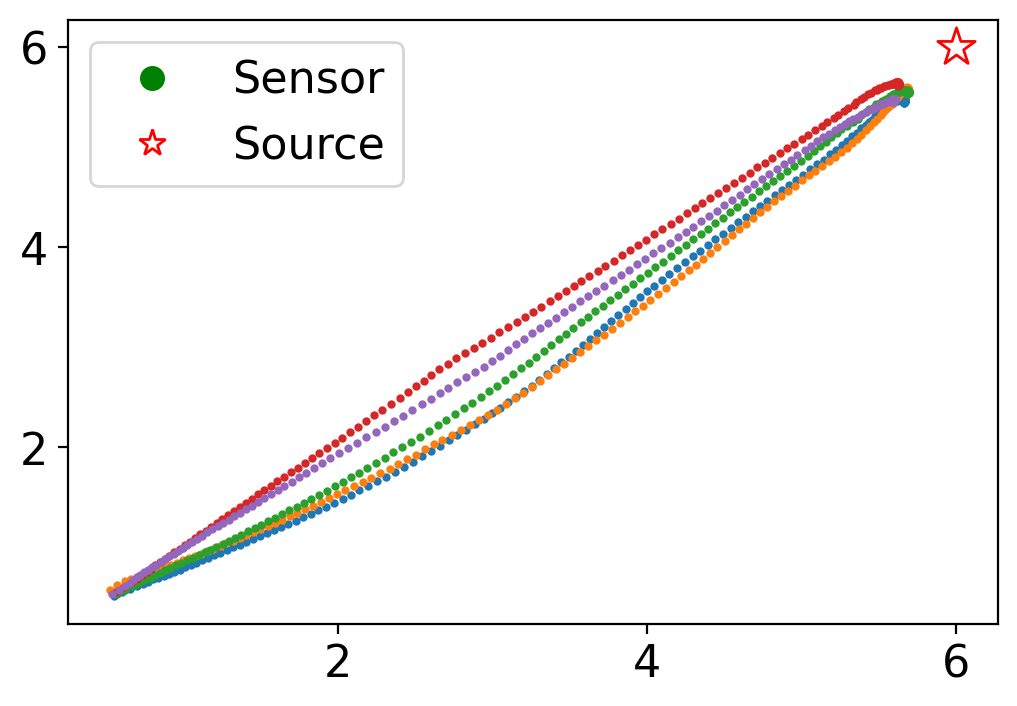

In [38]:
N_sen = 5
# Load data
with open('CoordConsensusEst-{}Senor-5FIMConsIter.pkl'.format(N_sen),'rb') as file:
    dfim = pkl.load(file)

dfim = dfim['Coord.+Consensus Est.']

# Showcase behavioral difference
p = dfim['p']
q = dfim['q']
ft,fm=plot_showcase(p,q)
# ft.savefig('Distributed-FIM-trials.png')
# fm.savefig('Distributed-FIM-mean.png')

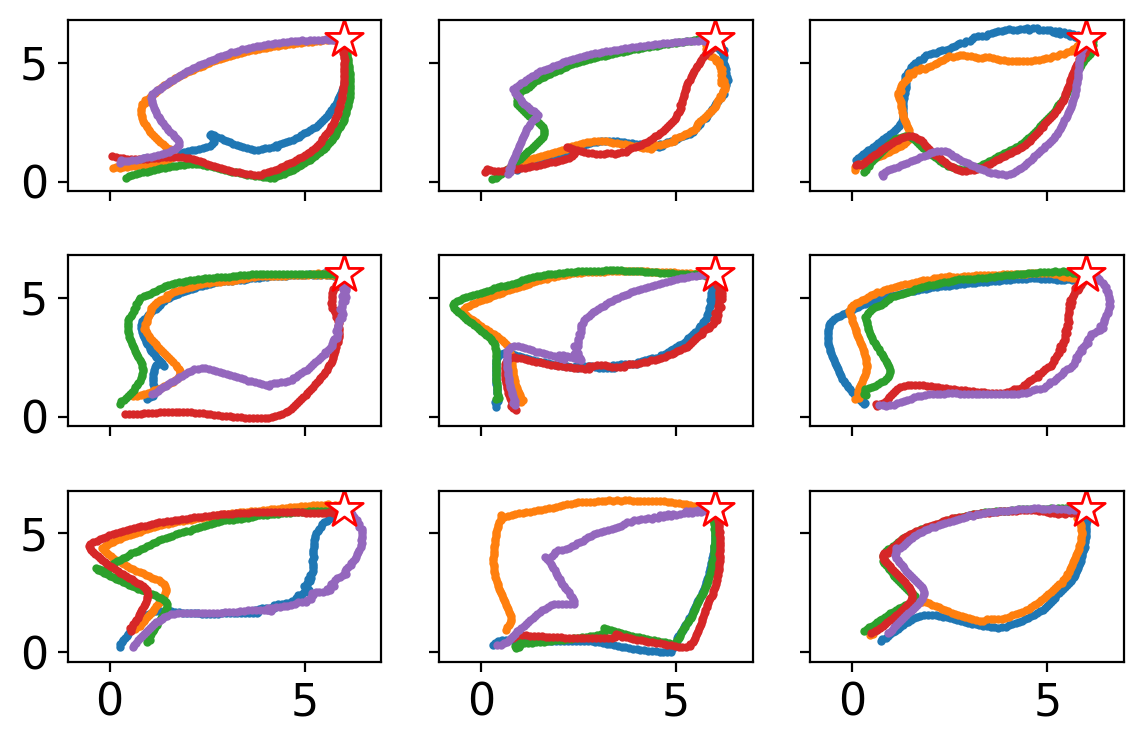

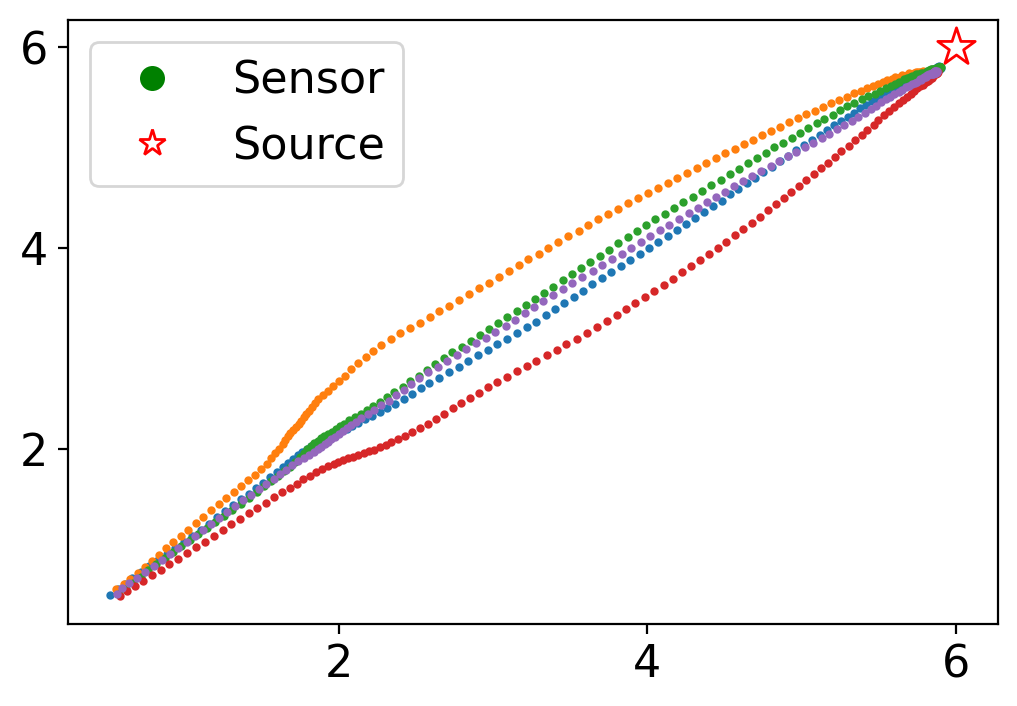

In [98]:
N_sen = 5
# Load data
with open('Distributed-FIM-{}Senor.pkl'.format(N_sen),'rb') as file:
    dfim = pkl.load(file)

dfim = dfim['Coord.+Consensus Est.']

# Showcase behavioral difference
p = dfim['p']
q = dfim['q']
ft,fm=plot_showcase(p,q)
# ft.savefig('Distributed-FIM-trials.png')
# fm.savefig('Distributed-FIM-mean.png')

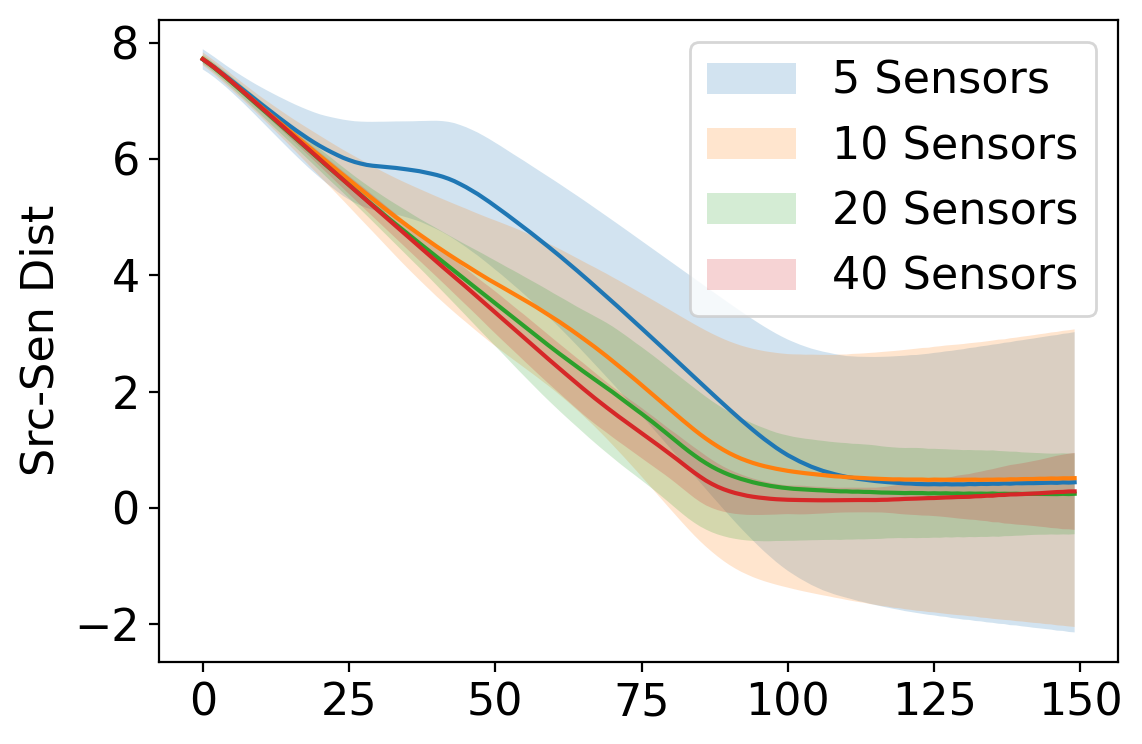

In [24]:
'''Plotting'''  
fig = plt.figure(dpi=200)
for N_sen in [5,10,20,40]:
    with open('Distributed-FIM-{}Senor.pkl'.format(N_sen),'rb') as file:
        d = pkl.load(file)
    
    d = d['Coord.+Consensus Est.']


    ps = np.array(d['p'])
    q = np.array(d['q'])

    dist = np.linalg.norm(ps-q[:,:,np.newaxis,:],axis=-1)

    ave_median_dist = np.mean(np.median(dist,axis=-1),axis=0)
    std_median_dist = np.std(np.median(dist,axis=-1),axis=0)
    N_iter=len(ave_median_dist)

    x = np.arange(N_iter)

#     plt.errorbar(x,ave_median_dist,yerr=std_median_dist,errorevery=10,label='{} Sensors'.format(N_sen))
    plt.plot(x,ave_median_dist)
    plt.fill_between(x,ave_median_dist+std_median_dist,ave_median_dist-std_median_dist,label='{} Sensors'.format(N_sen),alpha=0.2)
plt.legend()
plt.ylabel('Src-Sen Dist')

plt.tight_layout()
# fig.savefig("NoCoordLocalEst.png".format())
plt.show()

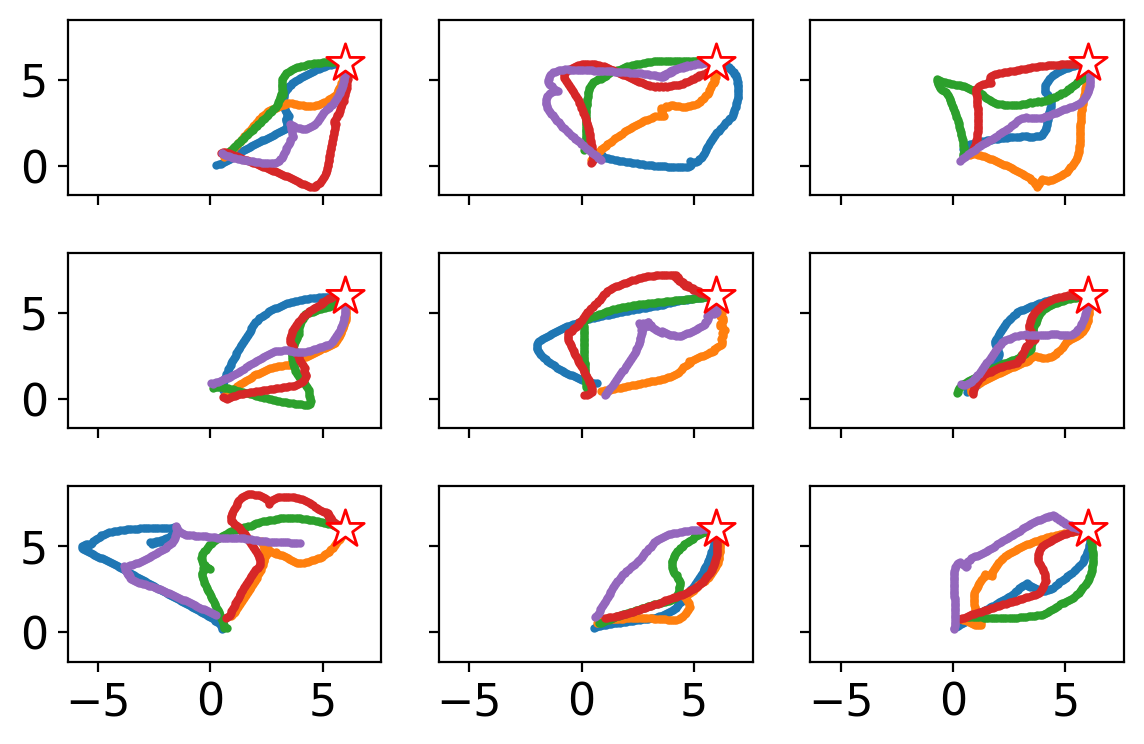

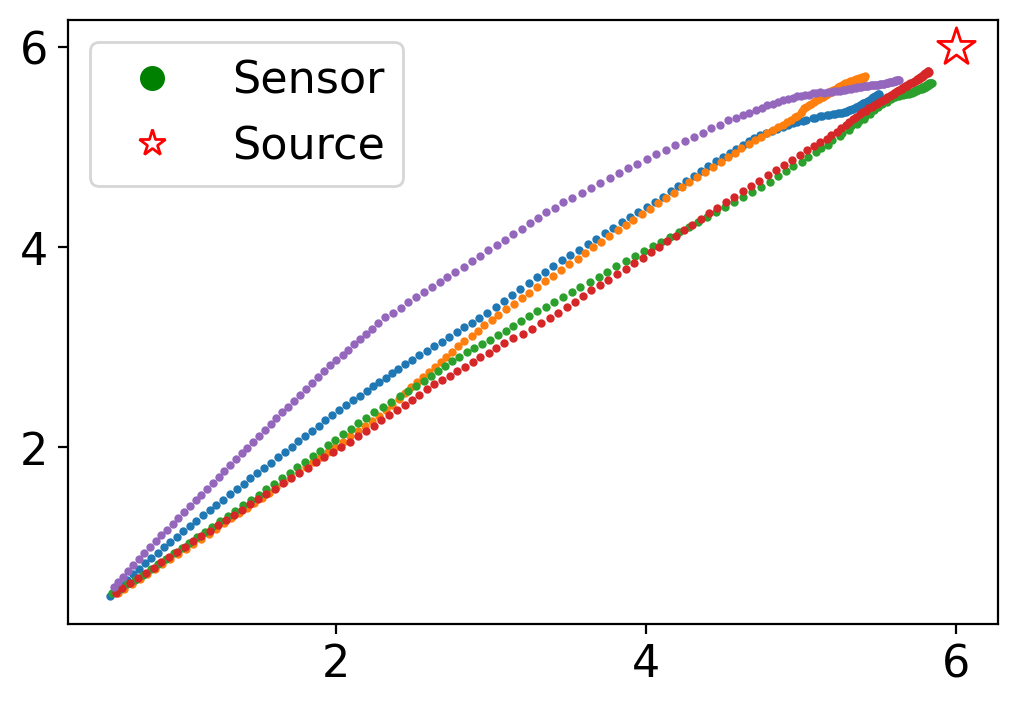

In [99]:
N_sen = 5
# Load data
with open('Distributed-FIM-{}Senor.pkl'.format(N_sen),'rb') as file:
    dfim = pkl.load(file)

dfim = dfim['No Coord.+Local Est.']

# Showcase behavioral difference
p = dfim['p']
q = dfim['q']
ft,fm=plot_showcase(p,q)
ft.savefig('NoCoordLocalEst-trials.png')
fm.savefig('NoCoordLocalEst-mean.png')

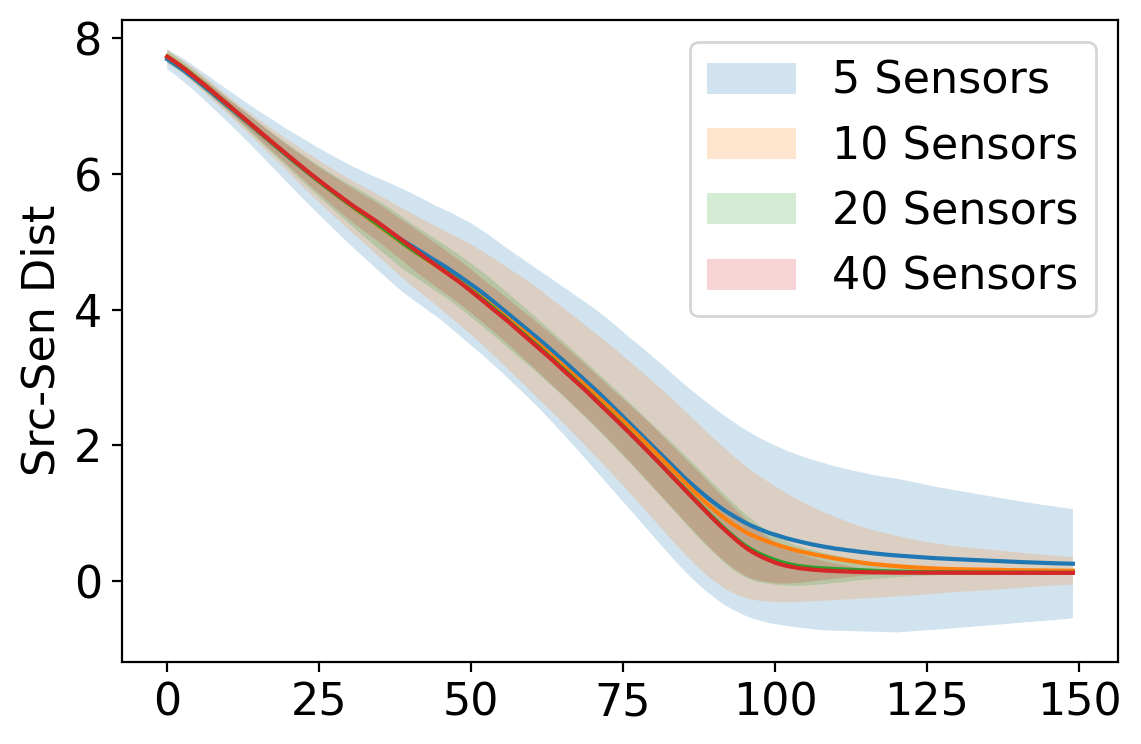

In [14]:
'''Plotting'''  
fig = plt.figure(dpi=200)
for N_sen in [5,10,20,40]:
    with open('Distributed-FIM-{}Senor.pkl'.format(N_sen),'rb') as file:
        d = pkl.load(file)
    
    d = d['No Coord.+Local Est.']


    ps = np.array(d['p'])
    q = np.array(d['q'])

    dist = np.linalg.norm(ps-q[:,:,np.newaxis,:],axis=-1)

    ave_median_dist = np.mean(np.median(dist,axis=-1),axis=0)
    std_median_dist = np.std(np.median(dist,axis=-1),axis=0)
    N_iter=len(ave_median_dist)

    x = np.arange(N_iter)

#     plt.errorbar(x,ave_median_dist,yerr=std_median_dist,errorevery=10,label='{} Sensors'.format(N_sen))
    plt.plot(x,ave_median_dist)
    plt.fill_between(x,ave_median_dist+std_median_dist,ave_median_dist-std_median_dist,label='{} Sensors'.format(N_sen),alpha=0.2)
plt.legend()
plt.ylabel('Src-Sen Dist')

plt.tight_layout()
fig.savefig("NoCoordLocalEst.png".format())
plt.show()

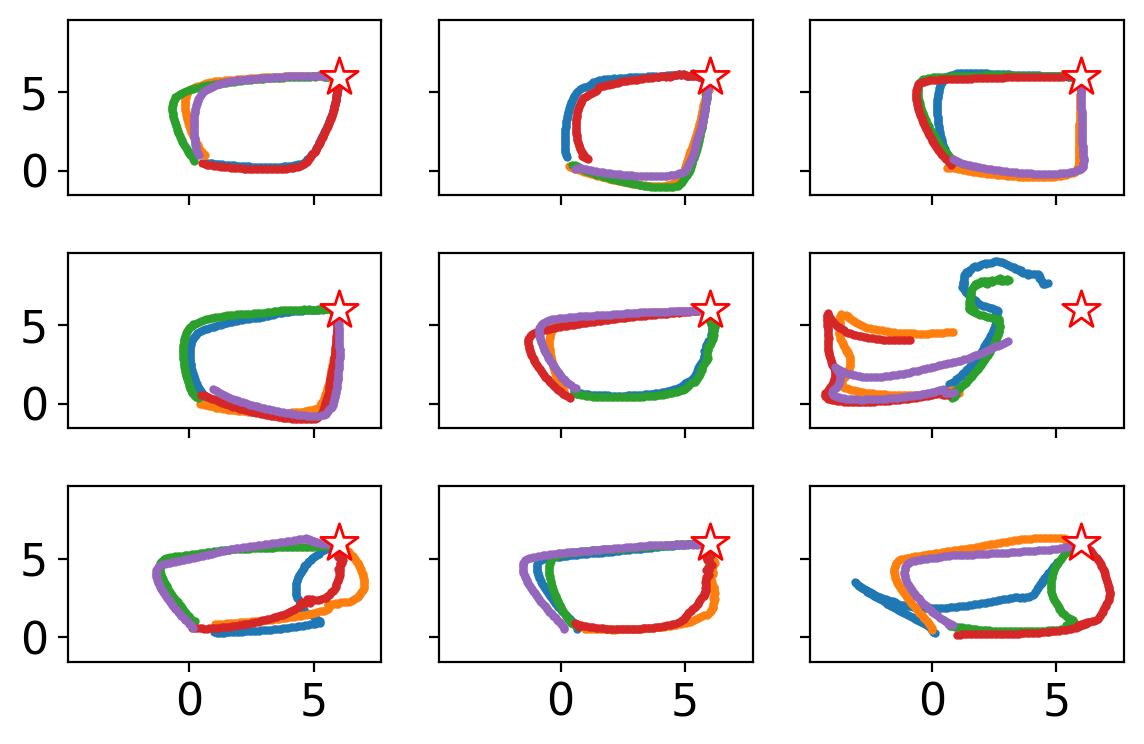

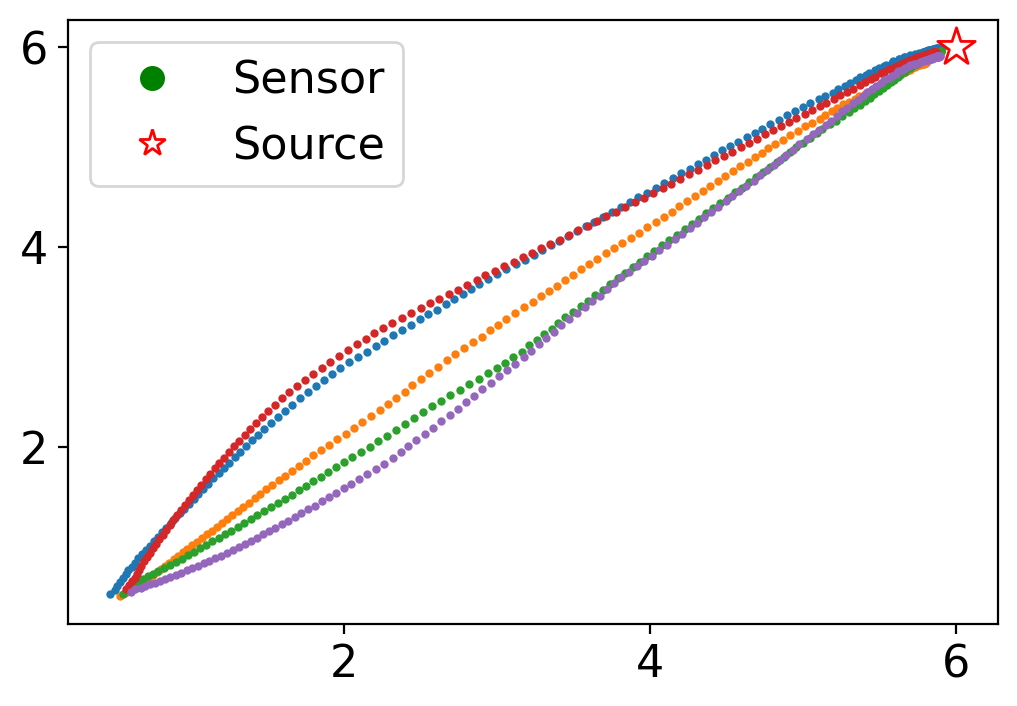

In [20]:
N_sen = 5
# Load data
with open('Distributed-FIM-{}Senor.pkl'.format(N_sen),'rb') as file:
    dfim = pkl.load(file)

dfim = dfim['No Coord.+Consensus Est.']

# Showcase behavioral difference
p = dfim['p']
q = dfim['q']
ft,fm=plot_showcase(p,q)
ft.savefig('NoCoordConsensusEst-trials.png')
fm.savefig('NoCoordConsensusEst-mean.png')

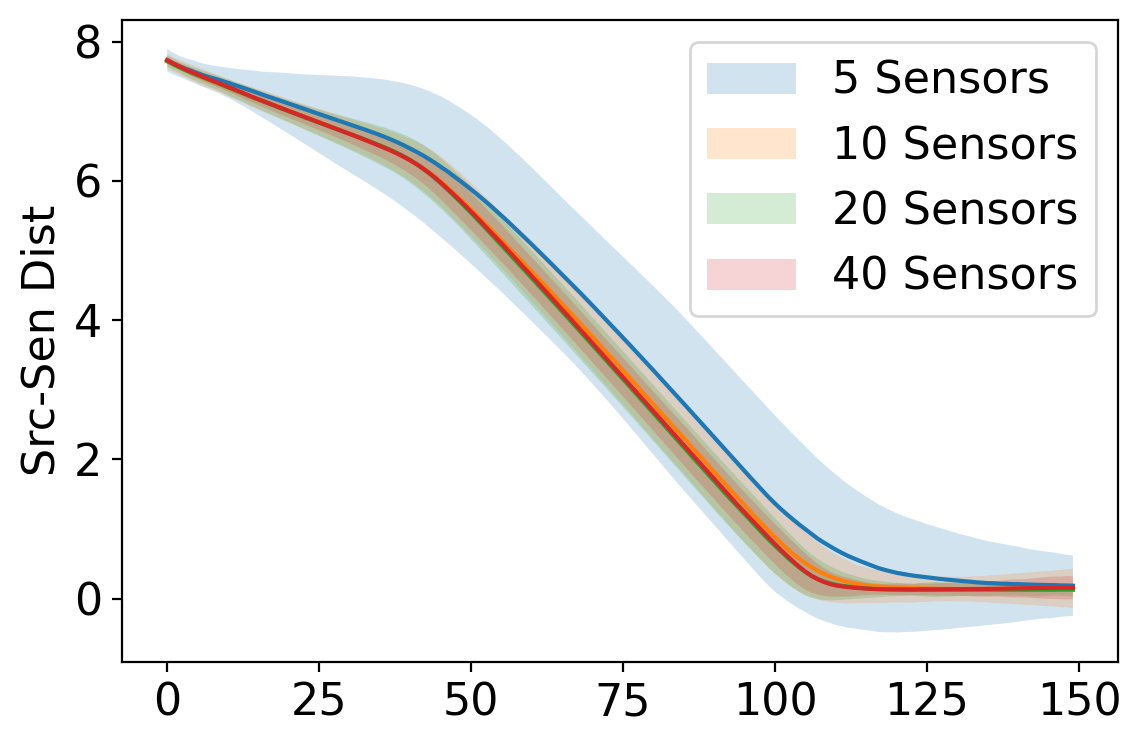

In [21]:
'''Plotting'''  
fig = plt.figure(dpi=200)
for N_sen in [5,10,20,40]:
    with open('Distributed-FIM-{}Senor.pkl'.format(N_sen),'rb') as file:
        d = pkl.load(file)
    
    d = d['No Coord.+Consensus Est.']


    ps = np.array(d['p'])
    q = np.array(d['q'])

    dist = np.linalg.norm(ps-q[:,:,np.newaxis,:],axis=-1)

    ave_median_dist = np.mean(np.median(dist,axis=-1),axis=0)
    std_median_dist = np.std(np.median(dist,axis=-1),axis=0)
    N_iter=len(ave_median_dist)

    x = np.arange(N_iter)

#     plt.errorbar(x,ave_median_dist,yerr=std_median_dist,errorevery=10,label='{} Sensors'.format(N_sen))
    plt.plot(x,ave_median_dist)
    plt.fill_between(x,ave_median_dist+std_median_dist,ave_median_dist-std_median_dist,label='{} Sensors'.format(N_sen),alpha=0.2)
plt.legend()
plt.ylabel('Src-Sen Dist')

plt.tight_layout()
fig.savefig("NoCoordConsensusEst.png".format())
plt.show()

In [3]:
def get_failure_rate(d):
    ps = np.array(d['p'])
    q = np.array(d['q'])

    dist = np.linalg.norm(ps-q[:,:,np.newaxis,:],axis=-1)

    failure_rate = np.mean(np.any(dist[:,-1,:]>0.1*2,axis=1))
    
    return failure_rate

In [4]:
fr = []
for N_sen in [5,10,20,40]:
    with open('Distributed-FIM-{}Senor.pkl'.format(N_sen),'rb') as file:
        d = pkl.load(file)
        
    failure_rates ={}
    for key,item in d.items():
        failure_rates[key]=get_failure_rate(item)
    fr.append(failure_rates)
    
fr = {key:[f[key] for f in fr] for key in fr[1].keys()}

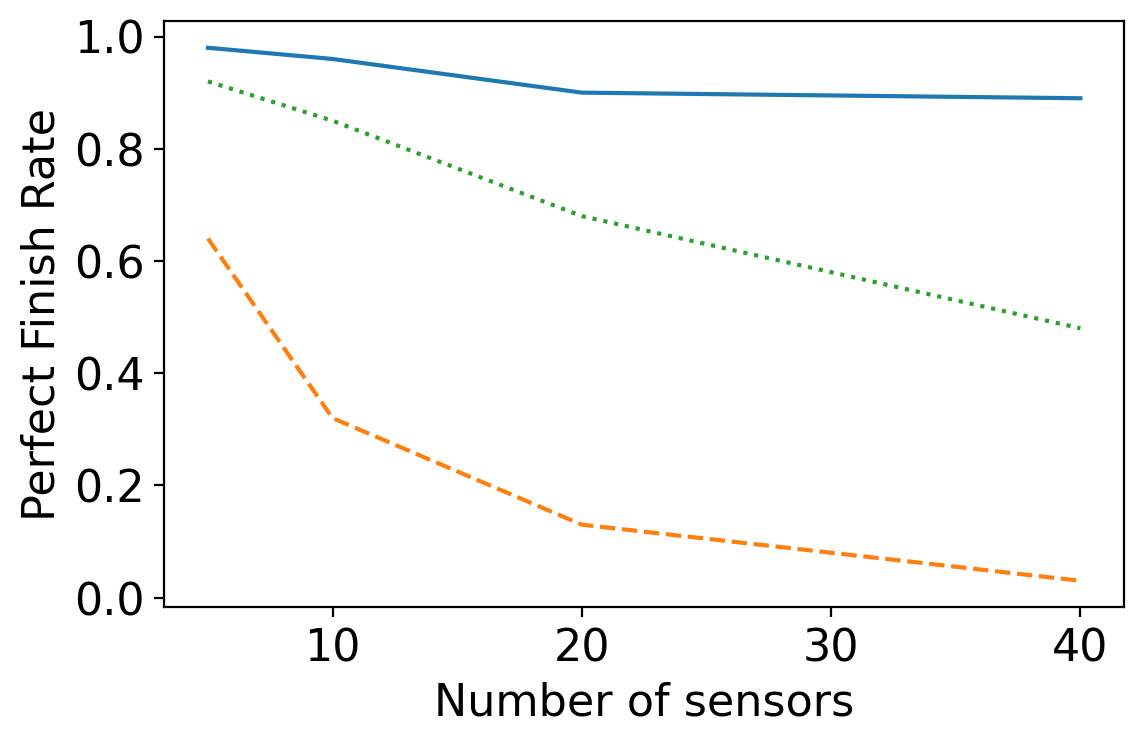

<Figure size 432x288 with 0 Axes>

In [41]:
plt.figure(dpi=200)
ls = ['solid','dashed','dotted']
for (key,item),linestyle in zip(fr.items(),ls):
    plt.plot([5,10,20,40],1-np.array(item),label=key,linestyle = linestyle)


plt.rcParams['font.size'] = '16'

plt.xlabel('Number of sensors')
plt.ylabel('Perfect Finish Rate')
# plt.legend(['Our algorithm','Variation II','Variation I'],loc='upper right', bbox_to_anchor=(0.05, 1.2),ncol=3)
plt.tight_layout()
plt.show()
plt.savefig('PerfectFinishRate.png')

# Last step deviation distribution

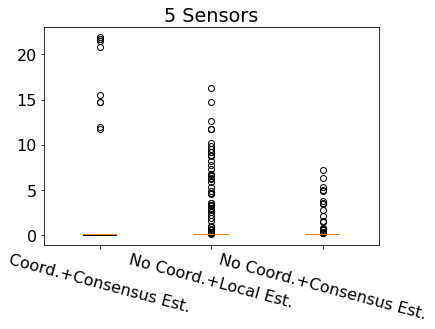

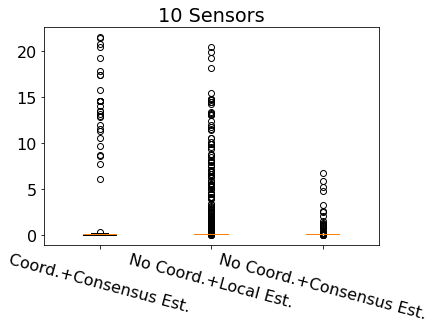

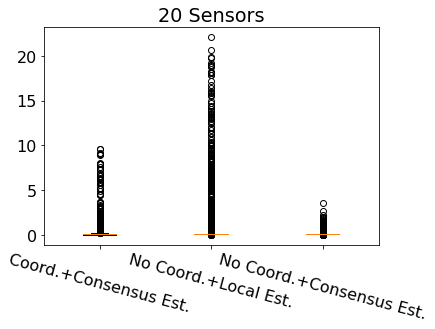

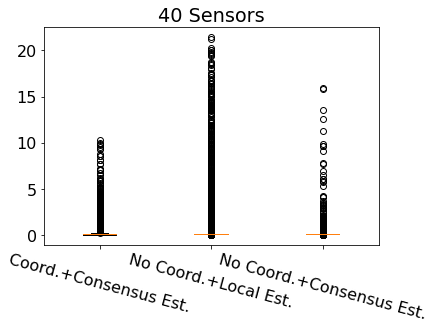

In [82]:
for N_sen in [5,10,20,40]:

    with open('Distributed-FIM-{}Senor.pkl'.format(N_sen),'rb') as file:
        d = pkl.load(file)

        dist_data = {}
        for key,d in d.items():

            ps = np.array(d['p'])
            q = np.array(d['q'])

            dist_data[key] = np.linalg.norm(ps-q[:,:,np.newaxis,:],axis=-1)[:,-1,:].ravel()

        plt.boxplot(list(dist_data.values()),labels = dist_data.keys())
        plt.xticks(rotation=-15)
        plt.title('{} Sensors'.format(N_sen))
        plt.show()